In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../fairjob.csv')

In [3]:
# we don't want id's of user , impression(session) and product(job) so we will drop those columns
df = df.drop(columns=['user_id','impression_id','product_id'])

In [4]:
# let's rename the feature 'protected_attribute' to 'gender'
df = df.rename(columns={'protected_attribute':'gender'})

In [6]:
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=['click'])
# y = df['click']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
df.columns

Index(['click', 'gender', 'senior', 'displayrandom', 'rank', 'cat0', 'cat1',
       'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
       'cat11', 'cat12', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21',
       'num22', 'num23', 'num24', 'num25', 'num26', 'num27', 'num28', 'num29',
       'num30', 'num31', 'num32', 'num33', 'num34', 'num35', 'num36', 'num37',
       'num38', 'num39', 'num40', 'num41', 'num42', 'num43', 'num44', 'num45',
       'num46', 'num47', 'num48', 'num49', 'num50'],
      dtype='object')

In [6]:
cat_features = [f'cat{i}' for i in range(0,13)]
num_features = [f'num{i}' for i in range(16,51)]
known_features = ['gender', 'senior', 'displayrandom', 'rank']


In [ ]:
for feature in cat_features:
    means = df.groupby(feature)['click'].mean().sort_values()
    print(means[0:6])
    print(means[-4:])



cat0
1    0.003744
2    0.004014
6    0.005757
7    0.005914
8    0.006604
3    0.006618
Name: click, dtype: float64
cat0
3    0.006618
4    0.007290
0    0.010816
5    0.012316
Name: click, dtype: float64
cat1
2    0.003317
1    0.004270
6    0.005679
7    0.005847
0    0.005852
3    0.006922
Name: click, dtype: float64
cat1
3    0.006922
8    0.006968
4    0.007693
5    0.012788
Name: click, dtype: float64
cat2
33     0.0
52     0.0
984    0.0
54     0.0
58     0.0
59     0.0
Name: click, dtype: float64
cat2
273    0.083333
487    0.083333
677    0.142857
69     0.166667
Name: click, dtype: float64
cat3
25    0.000000
71    0.000000
96    0.000000
44    0.000810
86    0.003155
35    0.003255
Name: click, dtype: float64
cat3
47    0.014805
16    0.015727
42    0.016949
12    0.017065
Name: click, dtype: float64
cat4
107    0.000000
113    0.000000
93     0.000000
27     0.001739
28     0.002211
1      0.002604
Name: click, dtype: float64
cat4
33     0.015453
66     0.017544
120    0.0

In [8]:
df

,click,gender,senior,displayrandom,rank,cat0,cat1,cat2,cat3,cat4,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
0,0,0,1,1,1,6,6,334,27,54,...,-0.333033,-0.542801,0.074884,-0.751637,-0.299223,-0.647541,-0.252768,-0.577173,-0.264359,-0.737299
1,0,0,1,0,3,8,8,284,97,43,...,-0.333033,-0.542801,-0.258659,0.503731,-0.523668,1.088225,0.935563,-0.577173,0.507790,0.610287
2,0,1,1,0,1,6,6,31,38,114,...,-0.333033,-0.542801,-0.236209,-0.111510,0.084159,0.422154,-0.160055,-0.577173,-0.264359,-0.063506
3,0,1,1,0,1,3,3,113,38,49,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.523668,-0.778977,-0.345480,-0.577173,4.368537,-0.996450
4,0,0,1,0,9,8,8,721,73,37,...,-0.333033,-0.542801,1.553377,-0.636441,-0.523668,-0.541088,-0.345480,-0.577173,-0.264359,-0.581808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072221,0,0,1,0,5,5,5,109,4,16,...,-0.333033,-0.542801,-0.393358,-0.661945,-0.494652,-0.668669,-0.345480,-0.577173,-0.264359,-0.633638
1072222,0,1,1,0,15,6,6,0,65,45,...,-0.333033,-0.542801,0.113370,1.352636,2.211655,1.445355,-0.160055,0.257664,-0.264359,1.439571
1072223,0,1,0,0,12,7,7,665,73,21,...,-0.050435,0.925347,-0.393358,-0.887341,-0.494652,-0.744993,-0.345480,1.092501,-0.264359,-0.840959
1072224,0,0,0,0,2,6,7,499,65,92,...,-0.333033,-0.542801,-0.393358,-0.937521,-0.523668,-0.761985,-0.345480,-0.577173,-0.264359,-0.892789


Lets plot the graph of categorical feature against click count to understand the distribution of clicks and see if the categories are ordinal or nominal

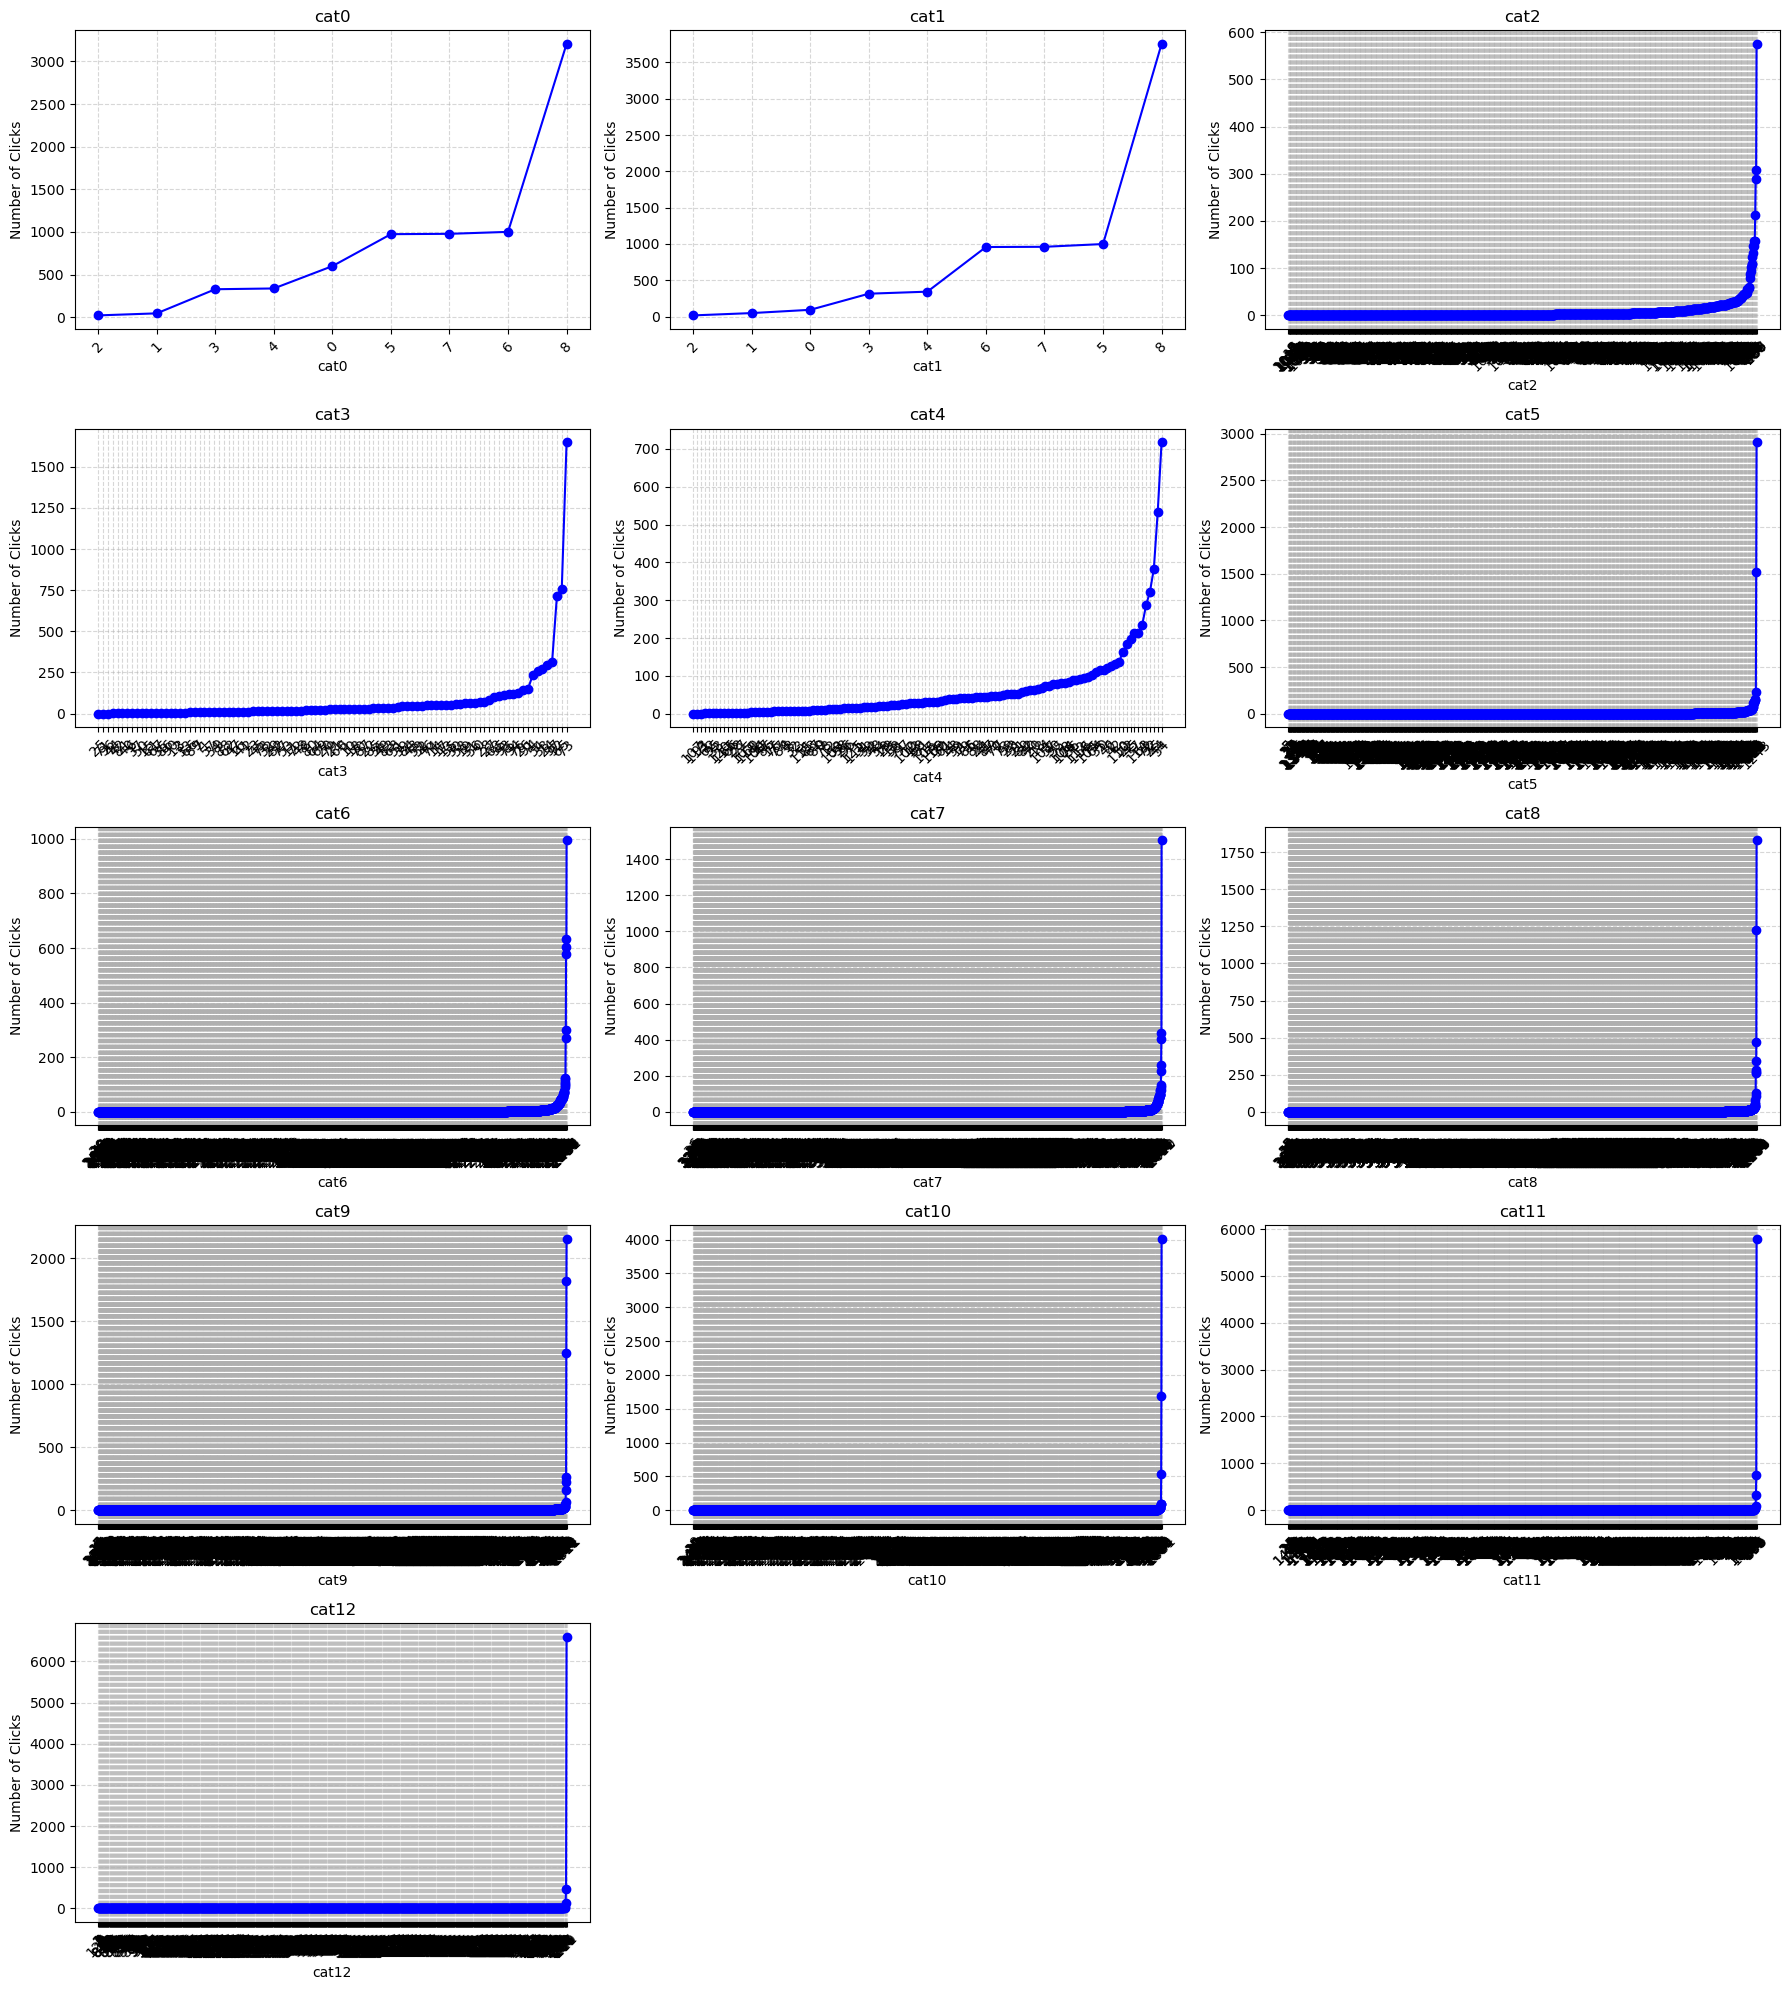

In [ ]:
import matplotlib.pyplot as plt

import math



# Number of plots
n_features = len(cat_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()  # make it easy to index

# Plot for each feature
for i, feature in enumerate(cat_features):
    ax = axes[i]
    
    # Group by feature and count clicks
    click_counts = df.groupby(feature)['click'].sum().sort_values()
    
    # Plot line graph
    ax.plot(click_counts.index.astype(str), click_counts.values, marker='o', linestyle='-', color='b')
    ax.set_title(f'{feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Number of Clicks', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

# Hide any extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


we can see the click count stays flat for almost all values for all categorical features, so we can say that the features are nominal

Text(0.5, 1.0, 'Click rate trend for cat12')

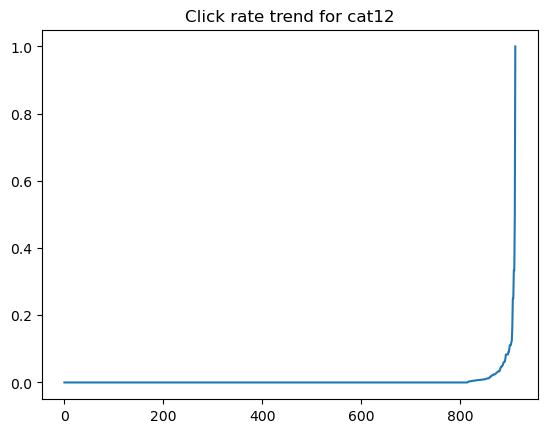

In [29]:
feature = 'cat12'
means = df.groupby(feature)['click'].mean().sort_values()
plt.plot(range(len(means)), means.values)
plt.title(f'Click rate trend for {feature}')


# Handling Cat features and feature scaling

In [7]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from scipy.sparse import hstack


target = 'click'

# ---- Split safely ----
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target])

# ---- Divide categorical columns by cardinality ----
low_card_cols = [col for col in cat_features if df[col].nunique() < 150]
mid_card_cols = [col for col in cat_features if 150 <= df[col].nunique() <= 1000]
high_card_cols = [col for col in cat_features if df[col].nunique() > 1000]


In [8]:

# ---- Target Encoder for medium cardinality ----
target_enc = TargetEncoder(cols=mid_card_cols)
train_target_encoded = target_enc.fit_transform(train_df[mid_card_cols], train_df[target])
test_target_encoded = target_enc.transform(test_df[mid_card_cols])

# ---- One-Hot Encoder for low cardinality ----
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
train_ohe = ohe.fit_transform(train_df[low_card_cols])
test_ohe = ohe.transform(test_df[low_card_cols])

# ---- Hashing for high cardinality ----
hasher = FeatureHasher(n_features=128, input_type='string')
train_hash = hasher.transform(train_df[high_card_cols].astype(str).to_dict(orient='records'))
test_hash = hasher.transform(test_df[high_card_cols].astype(str).to_dict(orient='records'))


In [9]:
from scipy import sparse
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

# Scaling numeric features BEFORE combining
scaler = StandardScaler()
scaled_train_numeric = scaler.fit_transform(train_df[num_features].values)
scaled_test_numeric = scaler.transform(test_df[num_features].values)

X_train = hstack([
    sparse.csr_matrix(train_df[num_features].values),  # numeric features
    train_target_encoded,                               # target-encoded features
    train_ohe,                                         # low-cardinality OHE features
    train_hash,                                        # high-cardinality hashed features
    sparse.csr_matrix(train_df[known_features].values)    # the 4 binary features
])

X_test = hstack([
    sparse.csr_matrix(test_df[num_features].values),
    test_target_encoded,
    test_ohe,
    test_hash,
    sparse.csr_matrix(test_df[known_features].values)
])



print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (857780, 406)
Test shape: (214446, 406)


In [10]:
y_train = train_df[target].values
y_test = test_df[target].values

# Dimensionality reduction using truncatedSVD

In [11]:
from sklearn.decomposition import TruncatedSVD

# Choose number of components (e.g., reduce to 100 features)
n_components = 100
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit on training data and transform both train and test
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

print("Original shape:", X_train.shape)
print("Reduced shape:", X_train_reduced.shape)


Original shape: (857780, 406)
Reduced shape: (857780, 100)


In [12]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Total variance retained:", explained_variance)


Total variance retained: 0.9914325412315066


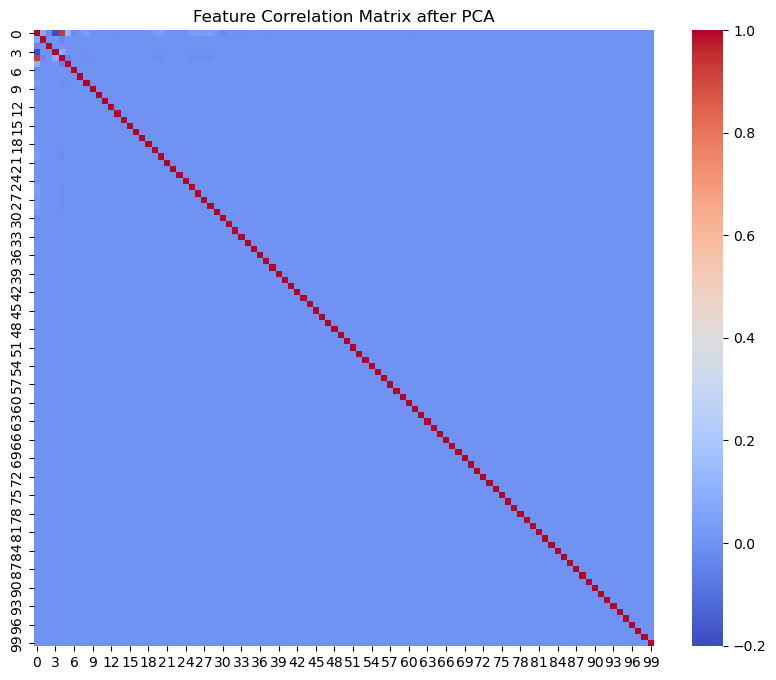

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# suppose your dataframe is named 'df'
X_train_reduced_df = pd.DataFrame(X_train_reduced)
corr_matrix = X_train_reduced_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix after PCA")
plt.show()


In [29]:
import pandas as pd

# # Compute the correlation matrix
# corr_matrix = df.corr(numeric_only=True).abs()  # absolute value (ignore sign)

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop those features
X_train_reduced_df = X_train_reduced_df.drop(columns=to_drop)

print(f"Removed {len(to_drop)} highly correlated features:")
print(to_drop)
print("\nNew shape:", X_train_reduced_df.shape)


Removed 1 highly correlated features:
[4]

New shape: (857780, 99)


In [30]:
to_drop

[4]

In [28]:
type(X_train_reduced)

numpy.ndarray

# Visualizing the data

c:\Users\2502h\anaconda3\envs\fairjob\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


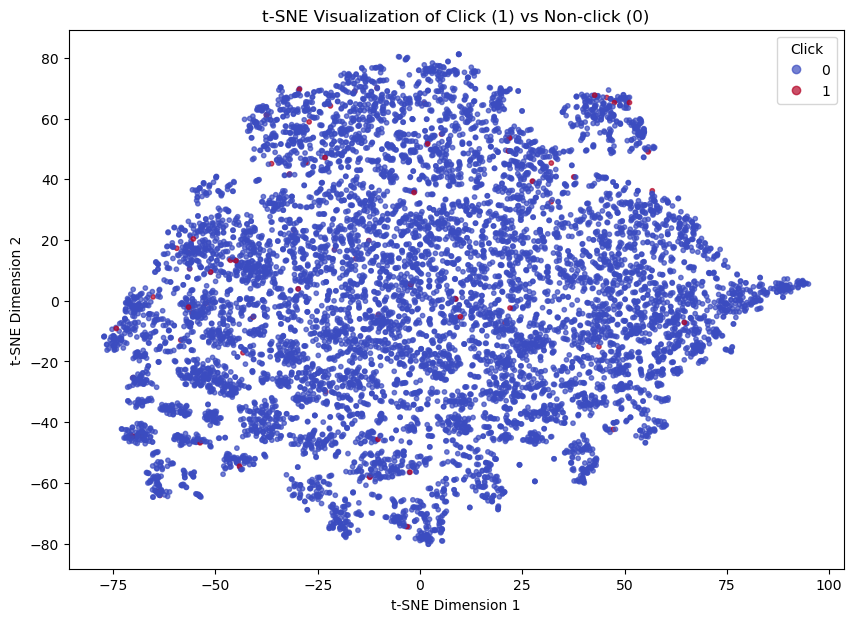

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 💡 Subsample for visualization (to avoid heavy computation)
n_samples = 10000
if X_train_reduced.shape[0] > n_samples:
    idx = np.random.choice(X_train_reduced.shape[0], n_samples, replace=False)
    X_subset = X_train_reduced[idx]
    y_subset = y_train.iloc[idx] if hasattr(y_train, "iloc") else np.array(y_train)[idx]
else:
    X_subset = X_train_reduced
    y_subset = y_train

# 🌀 Run t-SNE (2D)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X_subset)

# 🎨 Plot the result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=y_subset, cmap='coolwarm', s=10, alpha=0.7
)
plt.title("t-SNE Visualization of Click (1) vs Non-click (0)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(*scatter.legend_elements(), title="Click")
plt.show()


In [21]:
y_subset.sum()/y_subset.shape[0]

np.float64(0.0069)

# Training models

In [23]:
!pip install wandb

   ---------------------------------------- 0.0/18.8 MB ? eta -:--:--
   -- ------------------------------------- 1.0/18.8 MB 7.2 MB/s eta 0:00:03
   ----- ---------------------------------- 2.4/18.8 MB 6.1 MB/s eta 0:00:03
   ------- -------------------------------- 3.4/18.8 MB 5.9 MB/s eta 0:00:03
   ---------- ----------------------------- 4.7/18.8 MB 6.1 MB/s eta 0:00:03
   ------------ --------------------------- 5.8/18.8 MB 5.6 MB/s eta 0:00:03
   ------------- -------------------------- 6.3/18.8 MB 5.4 MB/s eta 0:00:03
   --------------- ------------------------ 7.3/18.8 MB 5.1 MB/s eta 0:00:03
   ----------------- ---------------------- 8.4/18.8 MB 5.2 MB/s eta 0:00:02
   ------------------- -------------------- 9.2/18.8 MB 5.1 MB/s eta 0:00:02
   ---------------------- ----------------- 10.5/18.8 MB 5.1 MB/s eta 0:00:02
   ------------------------ --------------- 11.5/18.8 MB 5.0 MB/s eta 0:00:02
   -------------------------- ------------- 12.3/18.8 MB 5.1 MB/s eta 0:00:02
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-firestore 2.14.0 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.10.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,!=2.9.*,<3.0.0dev,>=1.34.0, which is not installed.
google-cloud-firestore 2.14.0 requires proto-plus<2.0.0dev,>=1.22.0, which is not installed.
google-cloud-firestore 2.14.0 requires proto-plus<2.0.0dev,>=1.22.2; python_version >= "3.11", which is not installed.
google-cloud-firestore 2.14.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 6.32.1 which is incompatible.


In [17]:
# we will log our experiment using wandb
import wandb
wandb.login(key="5a7ad4f54ed893e81007556f3fff3aa411503e6c")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\2502h\_netrc
wandb: Currently logged in as: 2502harshshah (2502harshshah-international-institute-of-information-tec) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [ ]:
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
#     "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
#     "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# }

# for name, model in models.items():
#     print(f"Training {name}...")
#     model.fit(X_train_reduced, y_train)
#     y_pred = model.predict(X_test_reduced)
    
#     acc = accuracy_score(y_test, y_pred)
    
#     # For binary classification, also compute ROC AUC
#     y_proba = model.predict_proba(X_test_reduced)[:, 1]
#     auc = roc_auc_score(y_test, y_proba)
    
#     print(f"{name} -> Accuracy: {acc:.4f}, ROC AUC: {auc:.4f}\n")


Training Logistic Regression...
Logistic Regression -> Accuracy: 0.9930, ROC AUC: 0.7847

Training Random Forest...
Random Forest -> Accuracy: 0.9929, ROC AUC: 0.7327

Training XGBoost...


c:\Users\2502h\anaconda3\envs\fairjob\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:04:31] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost -> Accuracy: 0.9929, ROC AUC: 0.8124

Training LightGBM...
[LightGBM] [Info] Number of positive: 5991, number of negative: 851789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.266278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 857780, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006984 -> initscore=-4.957081
[LightGBM] [Info] Start training from score -4.957081


c:\Users\2502h\anaconda3\envs\fairjob\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\2502h\anaconda3\envs\fairjob\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM -> Accuracy: 0.9922, ROC AUC: 0.8142



Since data is imbalanced accuracy is not the right metric so we will use some other metric

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Initialize model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train
print("Training Logistic Regression...")
lr_model.fit(X_train_reduced, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_reduced)
y_proba_lr = lr_model.predict_proba(X_test_reduced)[:, 1]

# Metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
precision_lr = precision_score(y_test, y_pred_lr,average=None)
recall_lr = recall_score(y_test, y_pred_lr,average=None)
f1_lr = f1_score(y_test, y_pred_lr,average=None)



Training Logistic Regression...


In [40]:

print(f"Logistic Regression -> Accuracy: {acc_lr:.4f}, ROC AUC: {auc_lr:.4f}, Precision: {precision_lr}, Recall: {recall_lr}, F1-score: {f1_lr}")

Logistic Regression -> Accuracy: 0.7028, ROC AUC: 0.7958, Precision: [0.99752609 0.01747802], Recall: [0.70249075 0.75233645], F1-score: [0.82440695 0.03416239]


- LogisticRegression(max_iter=1000, random_state=42)\
=> Logistic Regression -> Accuracy: 0.9930, ROC AUC: 0.7847, Precision: [0.9930143 0.       ], Recall: [0.99996243 0.        ], F1-score: [0.99647625 0.        ]

- LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)\
=> Logistic Regression -> Accuracy: 0.7028, ROC AUC: 0.7958, Precision: [0.99752609 0.01747802], Recall: [0.70249075 0.75233645], F1-score: [0.82440695 0.03416239]


## XGBoost

In [15]:
from xgboost import XGBClassifier

# Initialize model
# xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)

xgb_model = XGBClassifier(
        n_estimators=100,
        scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # handles imbalance
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
# Train
print("Training XGBoost...")
xgb_model.fit(X_train_reduced, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_reduced)
y_proba_xgb = xgb_model.predict_proba(X_test_reduced)[:, 1]

# Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb,average=None)
recall_xgb = recall_score(y_test, y_pred_xgb,average=None)
f1_xgb = f1_score(y_test, y_pred_xgb,average=None)

print(f"XGBoost -> Accuracy: {acc_xgb:.4f}, ROC AUC: {auc_xgb:.4f}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1-score: {f1_xgb}")


Training XGBoost...
XGBoost -> Accuracy: 0.8915, ROC AUC: 0.8010, Precision: [0.99595777 0.03122981], Recall: [0.89438736 0.48397864], F1-score: [0.94244382 0.05867357]


In [35]:
from sklearn.metrics import precision_recall_curve

y_proba = xgb_model.predict_proba(X_test_reduced)[:, 1]
prec, rec, thr = precision_recall_curve(y_test, y_proba)

# Choose threshold that balances precision & recall
import numpy as np
f1 = 2 * (prec * rec) / (prec + rec)
best_thresh = thr[np.argmax(f1)]
print("Best threshold:", best_thresh)


Best threshold: 0.6308523


C:\Users\2502h\AppData\Local\Temp\ipykernel_8960\68383332.py:8: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (prec * rec) / (prec + rec)


#### performing XGboost with different threshold

In [16]:
# XGBoost with weighted classes and custom threshold

from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_recall_curve,
    precision_score, recall_score, f1_score, average_precision_score
)
import numpy as np

# 1️⃣ Train XGBoost model with imbalance handling
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # ratio of neg/pos
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

print("Training XGBoost model...")
xgb_model.fit(X_train_reduced, y_train)

# 2️⃣ Predict probabilities
y_proba = xgb_model.predict_proba(X_test_reduced)[:, 1]

# 3️⃣ Function to find best threshold (max F1-score)
def find_best_threshold(y_true, y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_idx = np.argmax(f1_scores)
    return thresholds[best_idx], precisions[best_idx], recalls[best_idx], f1_scores[best_idx]

# 4️⃣ Find best threshold
best_t, best_p, best_r, best_f1 = find_best_threshold(y_test, y_proba)
print(f"\n🔍 Best Threshold = {best_t:.3f}")
print(f"Precision: {best_p:.4f}, Recall: {best_r:.4f}, F1-score: {best_f1:.4f}")

# 5️⃣ Apply threshold and make predictions
y_pred_custom = (y_proba >= best_t).astype(int)




Training XGBoost model...

🔍 Best Threshold = 0.861
Precision: 0.0845, Recall: 0.1328, F1-score: 0.1033


In [17]:
# 6️⃣ Calculate all metrics
acc = accuracy_score(y_test, y_pred_custom)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
prec = precision_score(y_test, y_pred_custom, zero_division=0, average=None)
rec = recall_score(y_test, y_pred_custom, zero_division=0, average=None)
f1 = f1_score(y_test, y_pred_custom, zero_division=0, average=None)

# 7️⃣ Display results
print("\n📊 Final Evaluation Metrics (with optimal threshold):")
print(f"Accuracy: {acc:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")
print(f"Precision per class: {prec}")
print(f"Recall per class: {rec}")
print(f"F1-score per class: {f1}")


📊 Final Evaluation Metrics (with optimal threshold):
Accuracy: 0.9839
ROC AUC: 0.8188
PR AUC: 0.0445
Precision per class: [0.99387527 0.08450106]
Recall per class: [0.98987546 0.13284379]
F1-score per class: [0.99187133 0.10329613]


#### trying wandb on normal xgboost

In [ ]:
# XGBoost with weighted classes and the Experiment are tracked with wandb
from xgboost import XGBClassifier

scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # ratio of neg/pos


# 🟢 Initialize W&B project
wandb.init(
    project="xgboost-demo",  # change project name as you like
    config={
        "learning_rate": 0.1,
        "max_depth": 8,
        "n_estimators":150,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "random_state": 42,
        "eval_metric":'logloss',
        "n_jobs":-1,
        "scale_pos_weight":scale_pos_weight
    }
)

config = wandb.config  # easy access to parameters

# Split your data
# (Assuming you already have X_train_reduced and y_train ready)
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_reduced, y_train, test_size=0.2, random_state=config.random_state
)

# 🧠 Define and train XGBoost model
model = XGBClassifier(
    learning_rate=config.learning_rate,
    max_depth=config.max_depth,
    n_estimators=config.n_estimators,
    subsample=config.subsample,
    colsample_bytree=config.colsample_bytree,
    random_state=config.random_state,
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=config.scale_pos_weight
)

model.fit(X_train, y_train_split)

# 🧮 Evaluate on validation set
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]


accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, zero_division=0,average=None)
recall = recall_score(y_val, y_pred, zero_division=0,average=None)
f1 = f1_score(y_val, y_pred, zero_division=0,average=None)
roc_auc = roc_auc_score(y_val, y_prob)

weighted_precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
weighted_recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
weighted_f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
# 📊 Log metrics to W&B
wandb.log({
    "accuracy": accuracy,
    "weighted_precision": weighted_precision,
    "weighted_recall": weighted_recall,
    "weighted_f1_score": weighted_f1,
    "roc_auc": roc_auc,
    "positive_class_precision": precision[1],
    "positive_class_recall": recall[1],
    "positive_class_f1": f1[1],
    "negative_class_precision": precision[0],
    "negative_class_recall": recall[0],
    "negative_class_f1": f1[0]
})

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Weighted Precision: {weighted_precision:.3f}")
print(f"Weighted Recall: {weighted_recall:.3f}")
print(f"Weighted F1 Score: {weighted_f1:.3f}")

# ✅ Finish W&B run
wandb.finish()

### Hyperparameter tuning 

#### Prioritizing ROC AUC 

In [ ]:
## performing GridSearchCV
from sklearn.model_selection import GridSearchCV

# 🧱 Define base model
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# 🧠 Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [4, 6],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}


# ⚙️ Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="roc_auc",   # you can change to 'accuracy', 'f1', etc.
    cv=3,
    verbose=2,
    n_jobs=1
)




# 🧩 Fit on your data
grid_search.fit(X_train_reduced, y_train)
# 📊 Best parameters & best score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best ROC AUC: {grid_search.best_score_:.4f}")

# 🏆 Get best model and evaluate on validation data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_reduced)
y_prob = best_model.predict_proba(X_train_reduced)[:, 1]

accuracy = accuracy_score(y_train, y_pred)
weighted_precision = precision_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_recall = recall_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_f1 = f1_score(y_train, y_pred, average="weighted", zero_division=0)
roc_auc = roc_auc_score(y_train, y_prob)
precision = precision_score(y_train, y_pred, average=None, zero_division=0)
recall = recall_score(y_train, y_pred, average=None, zero_division=0)
f1 = f1_score(y_train, y_pred, average=None, zero_division=0)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc:.3f}")     
print(f"weighted Precision: {weighted_precision}")
print(f"weighted Recall: {weighted_recall}")
print(f"weighted F1 Score: {weighted_f1}")

#### Prioritizing F1

In [ ]:

## performing GridSearchCV
from sklearn.model_selection import GridSearchCV

scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # ratio of neg/pos

# 🧱 Define base model
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

# 🧠 Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [4, 6],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}


# ⚙️ Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="f1",   # you can change to 'accuracy', 'f1', etc.
    cv=3,
    verbose=2,
    n_jobs=2
)




# 🧩 Fit on your data
grid_search.fit(X_train_reduced, y_train)
# 📊 Best parameters & best score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best F1: {grid_search.best_score_:.4f}")

# 🏆 Get best model and evaluate on validation data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_reduced)
y_prob = best_model.predict_proba(X_train_reduced)[:, 1]

accuracy = accuracy_score(y_train, y_pred)
weighted_precision = precision_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_recall = recall_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_f1 = f1_score(y_train, y_pred, average="weighted", zero_division=0)
roc_auc = roc_auc_score(y_train, y_prob)
precision = precision_score(y_train, y_pred, average=None, zero_division=0)
recall = recall_score(y_train, y_pred, average=None, zero_division=0)
f1 = f1_score(y_train, y_pred, average=None, zero_division=0)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc:.3f}")     
print(f"weighted Precision: {weighted_precision}")
print(f"weighted Recall: {weighted_recall}")
print(f"weighted F1 Score: {weighted_f1}")

#### Prioritizing Recall

In [ ]:
## performing GridSearchCV
from sklearn.model_selection import GridSearchCV

scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # ratio of neg/pos

# 🧱 Define base model
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

# 🧠 Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [4, 6],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}


# ⚙️ Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="recall",   # you can change to 'accuracy', 'f1', etc.
    cv=3,
    verbose=2,
    n_jobs=2
)




# 🧩 Fit on your data
grid_search.fit(X_train_reduced, y_train)
# 📊 Best parameters & best score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best Recall: {grid_search.best_score_:.4f}")

# 🏆 Get best model and evaluate on validation data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_reduced)
y_prob = best_model.predict_proba(X_train_reduced)[:, 1]

accuracy = accuracy_score(y_train, y_pred)
weighted_precision = precision_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_recall = recall_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_f1 = f1_score(y_train, y_pred, average="weighted", zero_division=0)
roc_auc = roc_auc_score(y_train, y_prob)
precision = precision_score(y_train, y_pred, average=None, zero_division=0)
recall = recall_score(y_train, y_pred, average=None, zero_division=0)
f1 = f1_score(y_train, y_pred, average=None, zero_division=0)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc:.3f}")     
print(f"weighted Precision: {weighted_precision}")
print(f"weighted Recall: {weighted_recall}")
print(f"weighted F1 Score: {weighted_f1}")

#### Prioritizing Precision

In [ ]:
## performing GridSearchCV
from sklearn.model_selection import GridSearchCV
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # ratio of neg/pos

# 🧱 Define base model
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)

# 🧠 Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [4, 6],
    "subsample": [0.8],
    "colsample_bytree": [0.8]
}


# ⚙️ Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring="precision",   # you can change to 'accuracy', 'f1', etc.
    cv=3,
    verbose=2,
    n_jobs=2
)




# 🧩 Fit on your data
grid_search.fit(X_train_reduced, y_train)
# 📊 Best parameters & best score
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best Precision: {grid_search.best_score_:.4f}")

# 🏆 Get best model and evaluate on validation data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_reduced)
y_prob = best_model.predict_proba(X_train_reduced)[:, 1]

accuracy = accuracy_score(y_train, y_pred)
weighted_precision = precision_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_recall = recall_score(y_train, y_pred, average="weighted", zero_division=0)
weighted_f1 = f1_score(y_train, y_pred, average="weighted", zero_division=0)
roc_auc = roc_auc_score(y_train, y_prob)
precision = precision_score(y_train, y_pred, average=None, zero_division=0)
recall = recall_score(y_train, y_pred, average=None, zero_division=0)
f1 = f1_score(y_train, y_pred, average=None, zero_division=0)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc:.3f}")     
print(f"weighted Precision: {weighted_precision}")
print(f"weighted Recall: {weighted_recall}")
print(f"weighted F1 Score: {weighted_f1}")

## LightGBM

In [37]:
import lightgbm as lgb

# Initialize model
# lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)
lgb_model = lgb.LGBMClassifier(
        n_estimators=100,
        is_unbalance=True,  # similar to class_weight='balanced'
        random_state=42,
        n_jobs=-1
    )

# Train
print("Training LightGBM...")
lgb_model.fit(X_train_reduced, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test_reduced)
y_proba_lgb = lgb_model.predict_proba(X_test_reduced)[:, 1]

# Metrics
acc_lgb = accuracy_score(y_test, y_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_proba_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb,average=None)
recall_lgb = recall_score(y_test, y_pred_lgb,average=None)
f1_lgb = f1_score(y_test, y_pred_lgb,average=None)

print(f"LightGBM -> Accuracy: {acc_lgb:.4f}, ROC AUC: {auc_lgb:.4f}, Precision: {precision_lgb}, Recall: {recall_lgb}, F1-score: {f1_lgb}")


Training LightGBM...
[LightGBM] [Info] Number of positive: 5991, number of negative: 851789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.195953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 857780, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006984 -> initscore=-4.957081
[LightGBM] [Info] Start training from score -4.957081


c:\Users\2502h\anaconda3\envs\fairjob\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\2502h\anaconda3\envs\fairjob\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM -> Accuracy: 0.7231, ROC AUC: 0.7436, Precision: [0.99699663 0.01724684], Recall: [0.72331743 0.69025367], F1-score: [0.83838766 0.03365283]


- lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)\
=> Accuracy: 0.9922, ROC AUC: 0.8142, Precision: [0.99308275 0.08040201], Recall: [0.99914064 0.01068091], F1-score: [0.99610248 0.01885681]

- lgb_model = lgb.LGBMClassifier(
        n_estimators=100,
        is_unbalance=True,  # similar to class_weight='balanced'
        random_state=42,
        n_jobs=-1
    )\
=> 
LightGBM -> Accuracy: 0.7231, ROC AUC: 0.7436, Precision: [0.99699663 0.01724684], Recall: [0.72331743 0.69025367], F1-score: [0.83838766 0.03365283]

## RandomForest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train
print("Training Random Forest...")
rf_model.fit(X_train_reduced, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_reduced)
y_proba_rf = rf_model.predict_proba(X_test_reduced)[:, 1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf,average=None)
recall_rf = recall_score(y_test, y_pred_rf,average=None)
f1_rf = f1_score(y_test, y_pred_rf,average=None)

print(f"Random Forest -> Accuracy: {acc_rf:.4f}, ROC AUC: {auc_rf:.4f}, Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")


Training Random Forest...
Random Forest -> Accuracy: 0.9929, ROC AUC: 0.7327, Precision: [0.99302304 0.07692308], Recall: [0.9998873  0.00133511], F1-score: [0.99644335 0.00262467]


# Hyperparameter tuning results

In [20]:
2*0.984251*0.020864/(0.984251+0.020861)

0.0408619394933102

Best Parameters:\
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}\
Best F1: 0.0023\
Accuracy: 0.993\
Precision: [0.9931604  0.98425197]\
Recall: [0.99999765 0.02086463]\
F1 Score: [0.9965673  0.04086303]\
ROC AUC: 0.956\
weighted Precision: 0.9930981847723872\
weighted Recall: 0.9931590850800904\
weighted F1 Score: 0.9898923675875979\

Best Parameters:\
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}\
Best ROC AUC: 0.8327\
Accuracy: 0.993\
Precision: [0.99302843 1.        ]\
Recall: [1.         0.00183609]\
F1 Score: [0.99650202 0.00366544]\
ROC AUC: 0.925\
weighted Precision: 0.9930771176899821\
weighted Recall: 0.9930285154701671\
weighted F1 Score: 0.9895677430586443\

Best Parameters:\
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}\
Best Recall: 0.7094\
Accuracy: 0.772\
Precision: [0.99758071 0.02214654]\
Recall: [0.77212667 0.73376732]\
F1 Score: [0.87049269 0.0429954 ]\
ROC AUC: 0.833\
weighted Precision: 0.9907679757917593\
weighted Recall: 0.7718587516612652\
weighted F1 Score: 0.8647131934058195\

<font color='#00ff00'>In the above results, when F1 and ROC AUC were prioritized, mistakes on minority class was not penalized\
When Recall was prioritized, mistakes on minority class were penalized\
below is the result when F1 is prioritized, and mistakes on minority class were penalized\


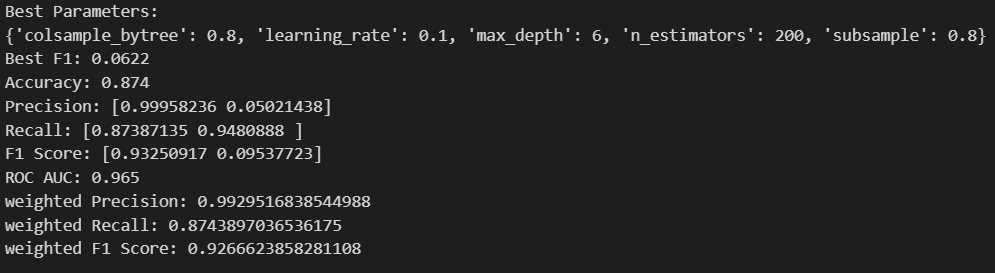

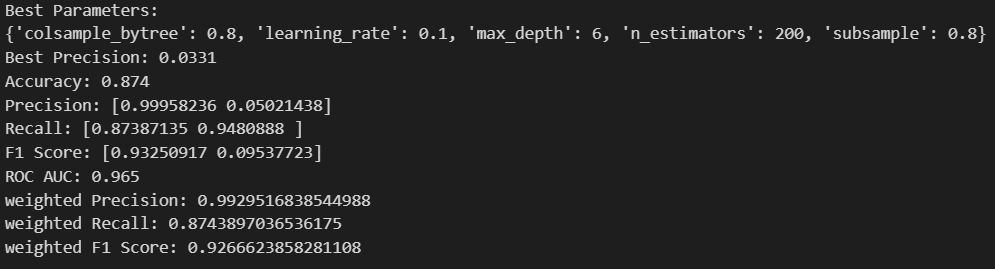

<font color='#00ff00'>below is the result when we test our model on `X_test_reduced` and above is the result when we test our model on `X_train_reduced`

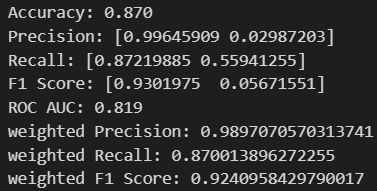

<font color='#00ff00'>Below is the result of XGBoost with different threshold</font>

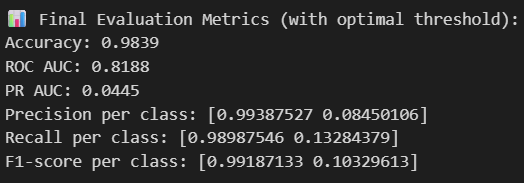